# 10000 Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [16]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [17]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [18]:
print(data['diabetes'].unique(),data['gender'].unique())

[0 1] ['Female' 'Male' 'Other']


In [19]:
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

over dan under sampling : 

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Salin data agar tidak merusak yang asli
balanced_data = data.copy()

# Encode kolom kategorikal
le_gender = LabelEncoder()
le_smoke = LabelEncoder()

balanced_data['gender'] = le_gender.fit_transform(balanced_data['gender'])
balanced_data['smoking_history'] = le_smoke.fit_transform(balanced_data['smoking_history'])


In [21]:
X = balanced_data.drop('diabetes', axis=1)
y = balanced_data['diabetes']


oversmapling

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Cek hasil distribusi baru
print("Setelah SMOTE:")
print(y_smote.value_counts())


Setelah SMOTE:
diabetes
0    91500
1    91500
Name: count, dtype: int64


In [26]:
X_smote = X_smote.drop(columns=['gender', 'age'])


In [31]:
print(X_smote.columns)


Index(['hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


In [32]:
data_smote = X_smote.copy()
data_smote['diabetes'] = y_smote


In [33]:
data_smote['smoking_history'].value_counts()

smoking_history
4    64215
0    51677
3    31983
1    17006
2    10495
5     7624
Name: count, dtype: int64

In [8]:
# label_encoder = LabelEncoder()
# data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])
# data['gender'] = label_encoder.fit_transform(data['gender'])

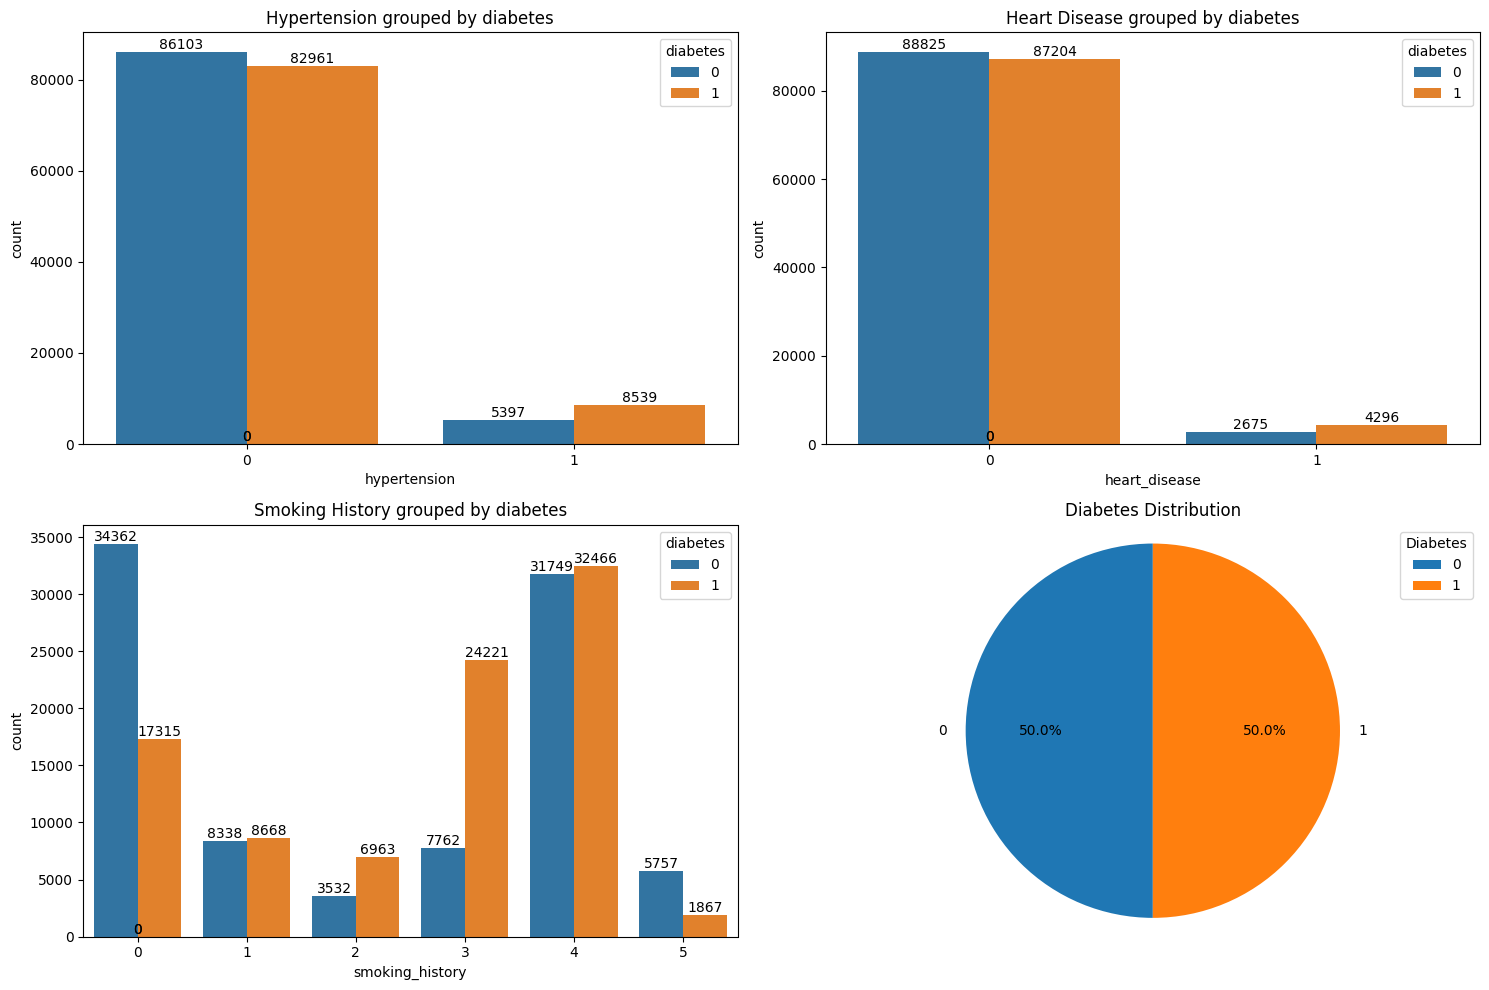

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_plot(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

fig1, axes = plt.subplots(2, 2, figsize=(15, 10))

# Visualisasi categorical feature yang masih ada
sns.countplot(x='hypertension', hue='diabetes', data=data_smote, ax=axes[0, 0])
axes[0, 0].set_title('Hypertension grouped by diabetes')
add_plot(axes[0, 0])

sns.countplot(x='heart_disease', hue='diabetes', data=data_smote, ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease grouped by diabetes')
add_plot(axes[0, 1])

sns.countplot(x='smoking_history', hue='diabetes', data=data_smote, ax=axes[1, 0])
axes[1, 0].set_title('Smoking History grouped by diabetes')
add_plot(axes[1, 0])

# Pie chart distribusi diabetes
diabetes_counts = data_smote['diabetes'].value_counts()
axes[1, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Diabetes Distribution')
axes[1, 1].axis('equal')
axes[1, 1].legend(title='Diabetes', loc='upper right')

plt.tight_layout()
plt.show()


In [38]:
max_age = data['age'].max()
min_age = data['age'].min()
avg_age = data['age'].mean()

print(f"max_age: {max_age} min_age: {min_age} , avg_age: {avg_age} \n\n")

grouped_result = data.groupby(['gender','diabetes'])['age'].agg(['min', 'max', 'mean']).reset_index()

print(grouped_result)


max_age: 80.0 min_age: 0.08 , avg_age: 41.885856 


   gender  diabetes   min   max       mean
0  Female         0  0.08  80.0  40.935065
1  Female         1  4.00  80.0  60.993499
2    Male         0  0.08  80.0  38.934209
3    Male         1  3.00  80.0  60.894776
4   Other         0  7.00  55.0  29.555556


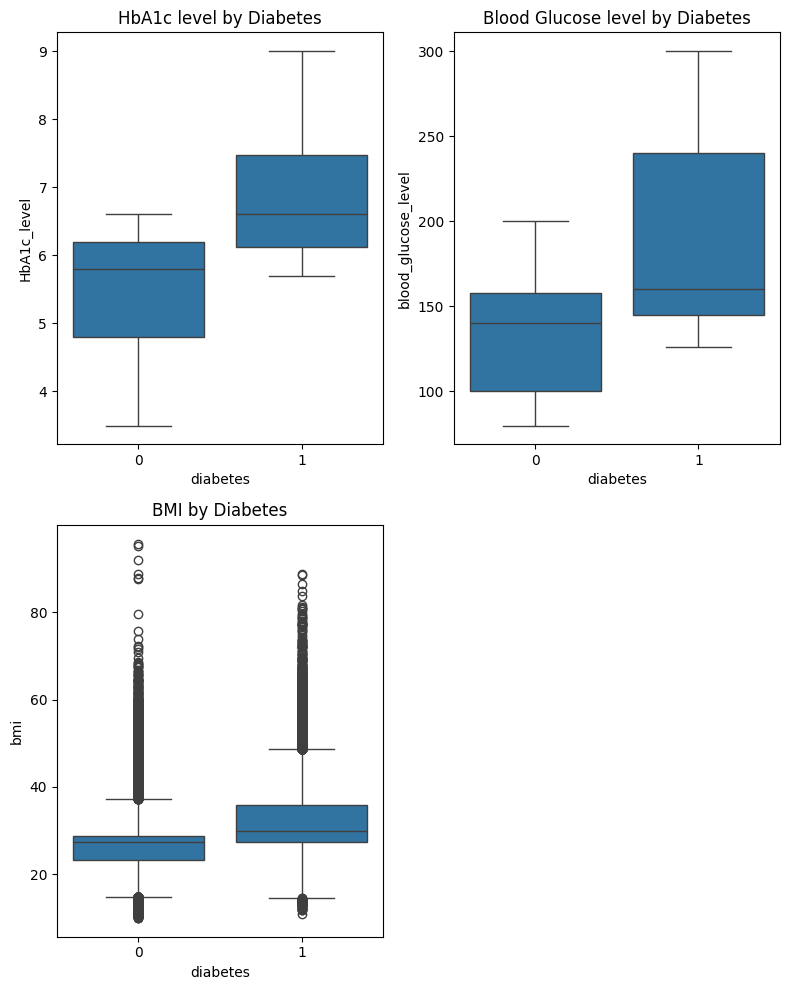

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig3, axes = plt.subplots(2, 2, figsize=(8, 10))

# Boxplot dengan data hasil oversampling (data_smote)
sns.boxplot(x='diabetes', y='HbA1c_level', data=data_smote, ax=axes[0, 0])
axes[0, 0].set_title('HbA1c level by Diabetes')

sns.boxplot(x='diabetes', y='blood_glucose_level', data=data_smote, ax=axes[0, 1])
axes[0, 1].set_title('Blood Glucose level by Diabetes')

sns.boxplot(x='diabetes', y='bmi', data=data_smote, ax=axes[1, 0])
axes[1, 0].set_title('BMI by Diabetes')

# Kosongkan satu panel terakhir
axes[1, 1].remove()

plt.tight_layout()
plt.show()


In [40]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [41]:
data.duplicated().sum()

data = data.drop_duplicates()

data.duplicated().sum()

0

# latih model

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.pipeline import Pipeline


In [47]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_columns = ['gender', 'smoking_history']




In [48]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])


In [46]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# SMOTE HARUS SESUDAH preprocessing, bukan sebelum
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),       # ubah string → angka dulu
    ('smote', SMOTE(random_state=42)),    # baru oversampling
    ('classifier', RandomForestClassifier(random_state=42))
])



In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [49]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17534
           1       0.75      0.76      0.75      1696

    accuracy                           0.96     19230
   macro avg       0.86      0.87      0.86     19230
weighted avg       0.96      0.96      0.96     19230

Confusion Matrix:

[[17096   438]
 [  410  1286]]


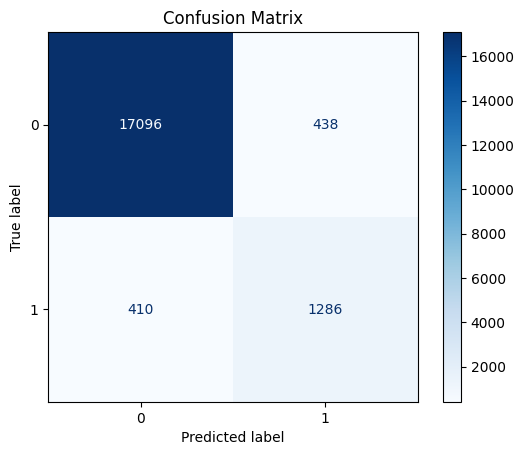

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = pipeline.predict(X_test)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Gambar Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [70]:
import joblib

# Simpan model ke file
joblib.dump(pipeline, "diabetes_model.pkl")

print("Model berhasil disimpan ke diabetes_model.pkl")


Model berhasil disimpan ke diabetes_model.pkl
